In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:50<00:00, 21.9MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.8MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',   # cat ---> 0 and dog ---> 1
    batch_size = 32,
    image_size = (256, 256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',   # cat ---> 0 and dog ---> 1
    batch_size = 32,
    image_size = (256, 256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
history = model1.fit(train_ds, epochs = 10, validation_data =validation_ds )

Epoch 1/10
625/625 [==============================] - 63s 88ms/step - loss: 0.5980 - accuracy: 0.6725 - val_loss: 0.5072 - val_accuracy: 0.7548
Epoch 2/10
625/625 [==============================] - 57s 91ms/step - loss: 0.4711 - accuracy: 0.7743 - val_loss: 0.4438 - val_accuracy: 0.7984
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3635 - accuracy: 0.8364 - val_loss: 0.4505 - val_accuracy: 0.8064
Epoch 4/10
625/625 [==============================] - 51s 82ms/step - loss: 0.2405 - accuracy: 0.8985 - val_loss: 0.5492 - val_accuracy: 0.8038
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1284 - accuracy: 0.9493 - val_loss: 0.9244 - val_accuracy: 0.7654
Epoch 6/10
625/625 [==============================] - 51s 82ms/step - loss: 0.0856 - accuracy: 0.9679 - val_loss: 0.9855 - val_accuracy: 0.7986
Epoch 7/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0605 - accuracy: 0.9790 - val_loss: 1.1035 - val_accuracy:

In [11]:
from keras.layers import BatchNormalization, Dropout

In [12]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),


model1.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1, activation = 'sigmoid'))

In [13]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [14]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
history = model1.fit(train_ds, epochs = 10, validation_data =validation_ds )

Epoch 1/10
625/625 [==============================] - 75s 112ms/step - loss: 1.1361 - accuracy: 0.6172 - val_loss: 0.5864 - val_accuracy: 0.6832
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5531 - accuracy: 0.7255 - val_loss: 1.5537 - val_accuracy: 0.4964
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4985 - accuracy: 0.7563 - val_loss: 0.5165 - val_accuracy: 0.7628
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4029 - accuracy: 0.8185 - val_loss: 0.5361 - val_accuracy: 0.7492
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3361 - accuracy: 0.8519 - val_loss: 0.4390 - val_accuracy: 0.7996
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2543 - accuracy: 0.8907 - val_loss: 0.4688 - val_accuracy: 0.8254
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1994 - accuracy: 0.9208 - val_loss: 0.6156 - val_ac

## object detection

In [22]:
import cv2
test_img = cv2.imread("/content/dog.jpeg")

In [23]:
import matplotlib.pyplot as plt
test_img.shape

(224, 225, 3)

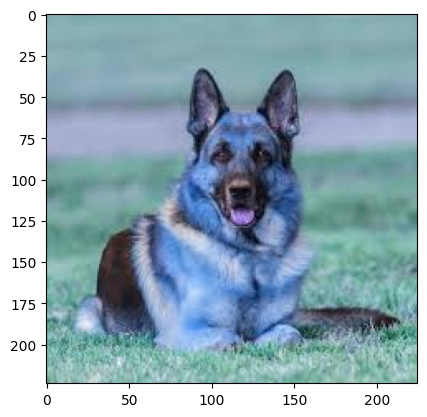

In [24]:
plt.imshow(test_img)
plt.show()

In [25]:
test_img = cv2.resize(test_img, (256, 256))

In [26]:
test_img.shape

(256, 256, 3)

In [27]:
test_img = test_img.reshape(1, 256, 256, 3)

In [28]:
test_img.shape

(1, 256, 256, 3)

In [30]:
result = model1.predict(test_img)

1/1 [==============================] - 0s 18ms/step


In [31]:
int(result)

<ipython-input-31-baa5c0abe21d>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(result)


1

In [32]:
result

array([[1.]], dtype=float32)